In [ ]:
# Question: Advanced Data Profiling and Outlier Detection
# Description: Perform detailed data profiling including outlier detection for numeric columns.




=== Data Profiling and Outlier Detection ===

Profiling column: sepal length (cm)
Statistics:
  count: 150.000
  mean: 5.843
  median: 5.800
  std_dev: 0.828
  min: 4.300
  max: 7.900
  25%: 5.100
  75%: 6.400
  unique_values: 35.000
Outliers detected by IQR method: 0
Outliers detected by Z-score method: 0


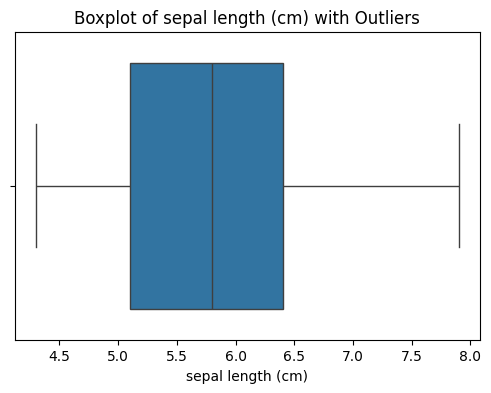

Profiling column: sepal width (cm)
Statistics:
  count: 150.000
  mean: 3.057
  median: 3.000
  std_dev: 0.436
  min: 2.000
  max: 4.400
  25%: 2.800
  75%: 3.300
  unique_values: 23.000
Outliers detected by IQR method: 4
  Outlier values (IQR): [4.4 4.1 4.2 2. ]
Outliers detected by Z-score method: 1
  Outlier values (Z-score): [4.4]


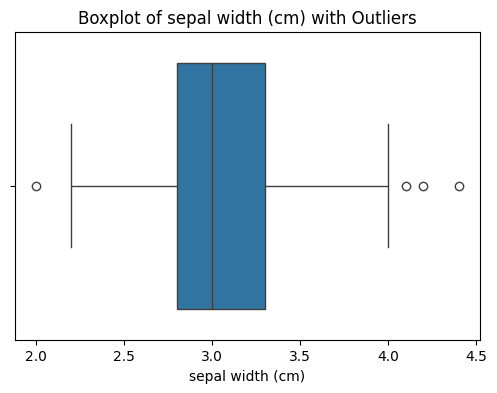

Profiling column: petal length (cm)
Statistics:
  count: 150.000
  mean: 3.758
  median: 4.350
  std_dev: 1.765
  min: 1.000
  max: 6.900
  25%: 1.600
  75%: 5.100
  unique_values: 43.000
Outliers detected by IQR method: 0
Outliers detected by Z-score method: 0


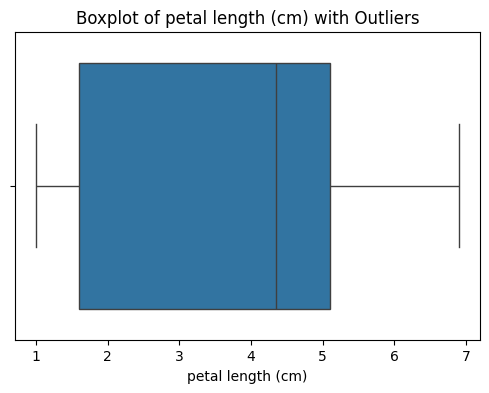

Profiling column: petal width (cm)
Statistics:
  count: 150.000
  mean: 1.199
  median: 1.300
  std_dev: 0.762
  min: 0.100
  max: 2.500
  25%: 0.300
  75%: 1.800
  unique_values: 22.000
Outliers detected by IQR method: 0
Outliers detected by Z-score method: 0


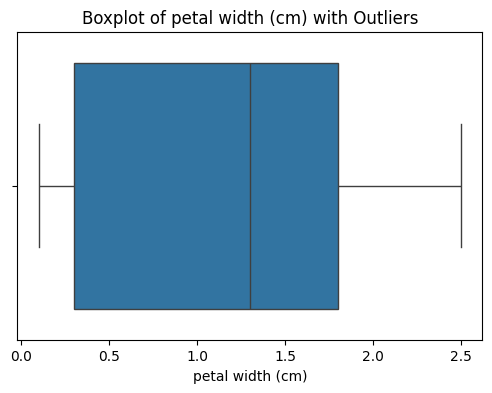

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

def data_profiling_with_outlier_detection(df):
    """
    Perform detailed data profiling including outlier detection for numeric columns.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        dict: Profiling summary including statistics and detected outliers per numeric column.
    """
    profiling_summary = {}

    print("=== Data Profiling and Outlier Detection ===\n")

    for col in df.select_dtypes(include=[np.number]).columns:
        print(f"Profiling column: {col}")

        col_data = df[col].dropna()

        # Basic statistics
        stats = {
            'count': col_data.count(),
            'mean': col_data.mean(),
            'median': col_data.median(),
            'std_dev': col_data.std(),
            'min': col_data.min(),
            'max': col_data.max(),
            '25%': col_data.quantile(0.25),
            '75%': col_data.quantile(0.75),
            'unique_values': col_data.nunique()
        }

        # Interquartile Range (IQR) for outlier detection
        Q1 = stats['25%']
        Q3 = stats['75%']
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        # Identify outliers using IQR method
        outliers_iqr = col_data[(col_data < lower_fence) | (col_data > upper_fence)]

        # Identify outliers using Z-score method (threshold=3)
        z_scores = zscore(col_data)
        outliers_z = col_data[(np.abs(z_scores) > 3)]

        # Summary printout
        print("Statistics:")
        for k, v in stats.items():
            print(f"  {k}: {v:.3f}")
        print(f"Outliers detected by IQR method: {len(outliers_iqr)}")
        if len(outliers_iqr) > 0:
            print(f"  Outlier values (IQR): {outliers_iqr.values}")
        print(f"Outliers detected by Z-score method: {len(outliers_z)}")
        if len(outliers_z) > 0:
            print(f"  Outlier values (Z-score): {outliers_z.values}")

        # Visualization: Boxplot with outliers highlighted
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=col_data)
        plt.title(f"Boxplot of {col} with Outliers")
        plt.show()

        profiling_summary[col] = {
            'statistics': stats,
            'outliers_iqr': outliers_iqr.values,
            'outliers_zscore': outliers_z.values
        }

    return profiling_summary


# Example usage with sample dataset (Iris dataset numeric columns)
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

profiling_result = data_profiling_with_outlier_detection(df_iris)
